In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image

import warnings
warnings.filterwarnings(action='ignore')
%matplotlib inline

# Scikit-Learn
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error as MSE

# Ensemble Learning
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

In [2]:
fifa_data = pd.read_csv('C:/Users/MILAB/Desktop/자료/2022년 2학기/데이터마이닝/과제4/fifa_data_preprocessing.csv')
fifa_data.head()

,Unnamed: 0,age,continent_num,contract_period,position_num,prefer_foot_num,reputation,stat_overall,stat_potential,stat_skill_moves,value
0,0,31,2,3,4,0,5.0,94,94,4.0,110500000.0
1,1,27,1,2,1,1,4.0,91,93,1.0,72000000.0
2,2,31,2,3,4,1,5.0,91,91,3.0,80000000.0
3,3,32,1,2,2,1,4.0,91,91,3.0,51000000.0
4,4,25,1,3,1,1,3.0,90,93,1.0,68000000.0


#### Unnamed:0 삭제

In [3]:
fifa_data.pop("Unnamed: 0")
fifa_data.head()

,age,continent_num,contract_period,position_num,prefer_foot_num,reputation,stat_overall,stat_potential,stat_skill_moves,value
0,31,2,3,4,0,5.0,94,94,4.0,110500000.0
1,27,1,2,1,1,4.0,91,93,1.0,72000000.0
2,31,2,3,4,1,5.0,91,91,3.0,80000000.0
3,32,1,2,2,1,4.0,91,91,3.0,51000000.0
4,25,1,3,1,1,3.0,90,93,1.0,68000000.0


### Train Data 및 Test Data 분리 - 7 : 3으로
#### Random State는 17로 고정

In [6]:
X = fifa_data.iloc[:, :-1]
y = fifa_data.iloc[:, -1]

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=17)

In [11]:
X_train = X_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

X_train.head()

,age,continent_num,contract_period,position_num,prefer_foot_num,reputation,stat_overall,stat_potential,stat_skill_moves
0,33,2,1,2,0,1.0,69,69,2.0
1,24,1,1,2,0,1.0,66,70,2.0
2,23,1,4,3,1,1.0,71,74,3.0
3,26,1,3,3,1,1.0,67,68,3.0
4,25,1,2,2,0,1.0,69,72,2.0


In [13]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(6252, 9)
(2680, 9)
(6252,)
(2680,)


### 1. Linear Regression

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error

In [15]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

In [16]:
print('Slope:', lin_reg.coef_)

Slope: [-398827.17316811    8001.85334655  339772.63325042   79324.13938133
  291811.33992462 6366302.05258255  503167.8123908   -58865.16087545
  -35296.96520292]


In [17]:
print('Intercept:', lin_reg.intercept_)

Intercept: -24987873.95985577


In [18]:
y_train_pred = lin_reg.predict(X_train)
y_test_pred = lin_reg.predict(X_test)

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

print('MSE')
print('MSE Train', mean_squared_error(y_train, y_train_pred))
print('MSE Test', mean_squared_error(y_test, y_test_pred))
print('-' * 30)
print('RMSE')
print('RMSE Train', np.sqrt(mean_squared_error(y_train, y_train_pred)))
print('RMSE Test', np.sqrt(mean_squared_error(y_test, y_test_pred)))
print('-' * 30)
print('MAE')
print('MAE Train', mean_absolute_error(y_train, y_train_pred))
print('MAE Test', mean_absolute_error(y_test, y_test_pred))
print('-' * 30)
print('R^2')
print('R2 Score Train', r2_score(y_train, y_train_pred))
print('R2 Score Test', r2_score(y_test, y_test_pred))
print('-' * 30)
print('PCC')
print('PCC Train')
print(np.corrcoef(y_train, y_train_pred))
print('PCC Test')
print(np.corrcoef(y_test, y_test_pred))

MSE
MSE Train 11384464109531.379
MSE Test 13262641781230.375
------------------------------
RMSE
RMSE Train 3374087.1520355516
RMSE Test 3641791.012843869
------------------------------
MAE
MAE Train 1878575.0361935874
MAE Test 1905434.7243671922
------------------------------
R^2
R2 Score Train 0.6651468382931064
R2 Score Test 0.614245448222158
------------------------------
PCC
PCC Train
[[1.         0.81556535]
 [0.81556535 1.        ]]
PCC Test
[[1.        0.7837813]
 [0.7837813 1.       ]]


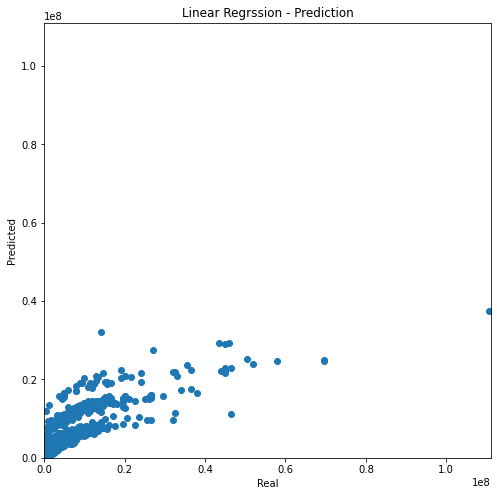

In [43]:
# Scatter Plot
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 8))
plt.title('Linear Regrssion - Prediction')
plt.xlabel('Real')
plt.ylabel('Predicted')

# X축, Y축 이거 범위를 어떻게 하누?

# 110500000
# plt.xlim([0, 1e7])
# plt.ylim([0, 1e7])
plt.xlim([0, 111000000])
plt.ylim([0, 111000000])

plt.scatter(y_test, y_test_pred)
plt.show()

### 2. Support Vector Regression (kernel = 'linear')